# Binary Classification using Logistic Regression

Find the category (0 or 1) given the features A and B.  
Write down your hypothesis, cost-function and gradient-descent and sklearn!

In [1]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
# read the data-set
data_set = pd.read_csv('data-set.csv')
# preview the data-set
data_set.head()

,featureA,featureB,category
0,-0.642621,-1.189619,0
1,-0.466056,-0.878662,1
2,-1.421364,1.177287,0
3,1.342973,1.491151,0
4,0.651247,-1.415052,0


In [3]:
# get more insights of the data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   featureA  500 non-null    float64
 1   featureB  500 non-null    float64
 2   category  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [4]:
# check for missing values
data_set.isnull().sum()

featureA    0
featureB    0
category    0
dtype: int64

Luckily we don't have any missing values in our data-set.

# Exploratory Data Analysis

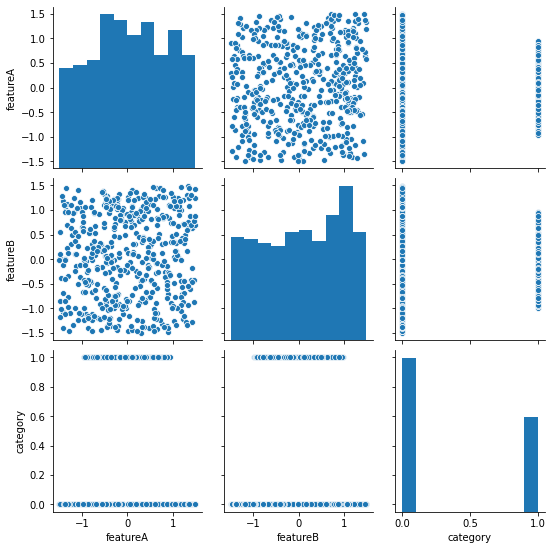

In [5]:
# look at the pairs
sns.pairplot(data_set)

<AxesSubplot:xlabel='category', ylabel='featureA'>

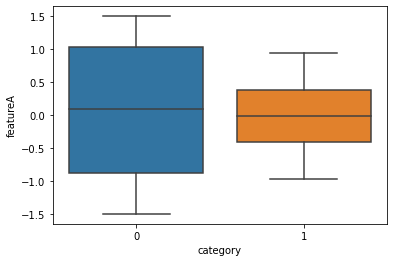

In [6]:
# box plot for featureA
sns.boxplot(x='category', y='featureA', data=data_set)

<AxesSubplot:xlabel='category', ylabel='featureB'>

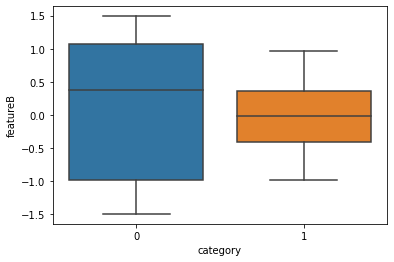

In [7]:
# box plot for featureB
sns.boxplot(x='category', y='featureB', data=data_set)

<AxesSubplot:>

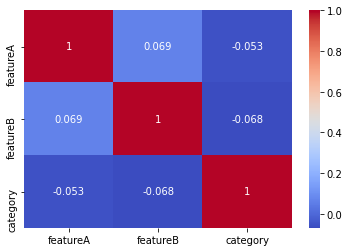

In [8]:
# correlation matrix
sns.heatmap(data_set.corr(), annot=True, cmap='coolwarm')

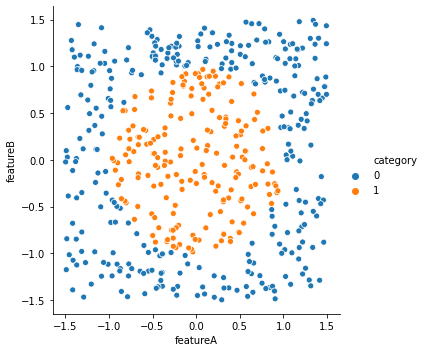

In [9]:
# look at the categorization of our data
sns.relplot(x='featureA', y='featureB', data=data_set, hue='category')

As clear from the data-set we cannot have a straight-line fit for the classification.  
In fact the plots seems to be a circluar classification and let's therefore go with quadratic curve as the decision boundary.  

# Logistic Regression Model

Let's consider our parameters to be $\theta_0, \theta_1, \theta_2, \theta_3, \theta_4, \theta_5$ and let us rename the features A and B to be $x_1$ and $x_2$ respectively then we will have the following hypothesis function:  
$h_\theta(x) = \frac{1}{1 + e^-{\theta^Tx}}$ where $\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \\ \theta_5 \end{bmatrix}$ and $x = \begin{bmatrix}x_0 \\ x_1 \\ x_2 \\ x_1^2 \\ x_2^2 \\ x_1 x_2\end{bmatrix}$ wher $x_0 = 1$ for all inputs  
$\implies \theta^T X = \theta_0 x_0 + \theta_1 x_1  + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2$

#### How do we interpret the hypothesis function?   
We say that $h_\theta(x) = P(category = 1 | x; \theta)$  
Furthermore if $h_\theta(x) \ge 0.5$ then we predict the category 1 otherwise we predict zero.  
Also we observe that $h_\theta(x) \ge 0.5 \implies \theta^Tx \ge 0$ and conversly $h_\theta(x) < 0.5 \implies \theta^Tx < 0$

Now we have to come up with a way to estimate the parameters based on the training data.  
We write our cost function as follows:  
$J(\theta) = \frac{1}{m} \sum_{i=1}^m cost(h_\theta(x^i), y^i)$ where $cost(h_\theta(x^i), y^i) = -y^i log(h_\theta(x^i)) - (1 - y^i)log(1 - h_\theta(x^i))$   
where $(x^i, y^i)$ denotes the $i^{th}$ training samples

Note that $cost = 0$ if $y = 1$ and $h_\theta(x) = 1$ and $h_\theta(x) \to 0 \implies cost \to \infty$  
It captures our intution that if our prediction $h_\theta(x) = 0$ but the actual category is 1 then we'll penalize learning algorithm by a very large cost.  

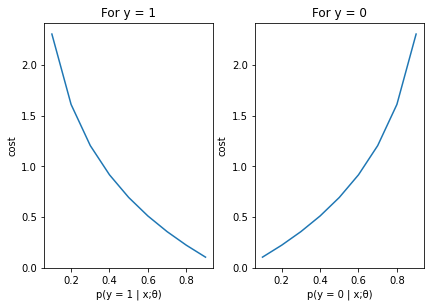

In [10]:
# distribution of cost w.r.t the predicted probability
plot_x = np.arange(0.1, 1.0, 0.1)
plot_y1 = -np.log(plot_x)
plot_y2 = -np.log(1 - plot_x)
fig, axes = plt.subplots(1, 2)
plt.tight_layout()
axes[0].plot(plot_x, plot_y1)
axes[0].set_title('For y = 1')
axes[0].set_xlabel('p(y = 1 | x;θ)')
axes[0].set_ylabel('cost')
axes[1].plot(plot_x, plot_y2)
axes[1].set_title('For y = 0')
axes[1].set_xlabel('p(y = 0 | x;θ)')
axes[1].set_ylabel('cost')
plt.show()

Finally we have the following cost function:  
$J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^i log(h_\theta(x^i)) + (1 - y^i)log(1 - h_\theta(x^i))]$  
Now our aim is to find a value of $\theta$ which minimizes the $J(\theta)$ for our given training data.  

Now to estimate the $\theta$ that minimize the value of $J(\theta)$ for our given training model.  
We will use the following methods:  
1. gradient descent  
3. sklearn

## Gradient descent method

As per the gradient descent method we start with random choice for $\theta$ and repeatedly performs the following task:  
Given $J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^i log(h_\theta(x^i)) + (1 - y^i)log(1 - h_\theta(x^i))]$  
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$  for all $j$ to reach to the optimum value for $\theta$

With calculus evaluation we have the following:  
$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m}\sum_{i=1}^{m} (h_\theta(x^i) - y^i) \frac{\partial \beta}{\partial \theta_j}$ where $\beta = \theta^T X = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2$

A more closer analysis of the above equation results into:  
$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^i) - y^i)x_j^i$  
where $x_j^i$ denotes the jth features of ith input

And therefore we can write  
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^i) - y^i)x_j^i$

A vectorized implementation is:  
$\theta := \theta - \alpha \frac{1}{m} X^T(g(X\theta) - \vec{y})$ where $g(z) = \frac{1}{1 + e^{-z}}$

In [11]:
# performs a single iteration of gradient descent
# required shapes => thetas:= (n + 1)x1, X:= mx(n + 1) and y:= mx1
def gradient_descent_iteration(alpha, thetas, X, y):
    # fetch the number of trainig samples
    m = len(y)
    # lambda for sigmoid function i.e. g(z) = 1 / (1 + e^-z)
    g = lambda z : 1 / (1 + np.exp(-z)) 
    # simultaneoulsy update theta_j
    X_theta = np.dot(X, thetas)
    g_X_theta = g(X_theta)
    thetas = thetas - alpha * (1 / m) * np.dot(X.T, g_X_theta - y)
    # return the updated values of thetas
    return thetas

As discussed above we have the following cost function:  
$J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^i log(h_\theta(x^i)) + (1 - y^i)log(1 - h_\theta(x^i))]$  

A vectorized implementation is:  
$J(\theta) = -\frac{1}{m}[y^T.log(g(X\theta)) + (1 - y^T).log(1 - g(X\theta))]$

In [12]:
# computes the cost
# required shapes => thetas:= (n + 1)x1, X:= mx(n + 1) and y:= mx1
def compute_cost(thetas, X, y):
    # compute the number of samples
    m = len(y) 
    # lambda for sigmoid function i.e. g(z) = 1 / (1 + e^-z)
    g = lambda z : 1 / (1 + np.exp(-z)) 
    # compute intermediate terms
    y_T = y.T
    X_theta = np.dot(X, thetas)
    g_X_theta = g(X_theta)
    # compute the cost (1x1 matrix)
    cost = (-1 / m) * (np.dot(y_T, np.log(g_X_theta)) + np.dot((1 - y_T), np.log(1 - g_X_theta)))
    # return the singleton element of computed cost
    return cost[0][0]

Now we have a function which can perform a single iteration of gradient-descent.  
Next we need to pick a learning rate $\alpha$ and then we will be good to go for the predictions.  

In [44]:
# let's separate the input and outputs
grad_x = data_set[['featureA', 'featureB']]
grad_y = data_set['category']
# preview the data-sets
print(grad_x.head(2))
print(grad_y.head(2))

   featureA  featureB
0 -0.642621 -1.189619
1 -0.466056 -0.878662
0    0
1    1
Name: category, dtype: int64


In [45]:
# let's add the additional quadratic features
grad_x['featureA_square'] = grad_x['featureA']**2
grad_x['featureB_square'] = grad_x['featureB']**2
grad_x['featureA_dot_featureB'] = grad_x['featureA']*grad_x['featureB']
# preview the input set
print(grad_x.head())
# stats
grad_x.describe()

   featureA  featureB  featureA_square  featureB_square  featureA_dot_featureB
0 -0.642621 -1.189619         0.412962         1.415194               0.764475
1 -0.466056 -0.878662         0.217208         0.772046               0.409505
2 -1.421364  1.177287         2.020277         1.386004              -1.673354
3  1.342973  1.491151         1.803576         2.223531               2.002575
4  0.651247 -1.415052         0.424123         2.002373              -0.921549


,featureA,featureB,featureA_square,featureB_square,featureA_dot_featureB
count,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,0.036154,0.066785,0.679774,7.472395e-01,0.051173
std,0.824516,0.862710,0.657139,6.403538e-01,0.709079
min,-1.496144,-1.495938,0.000010,8.584338e-07,-1.951692
25%,-0.590812,-0.702070,0.110053,1.344857e-01,-0.331657
50%,0.029387,0.097712,0.438848,6.341254e-01,0.018514
75%,0.723584,0.872407,1.138094,1.224589e+00,0.434908
max,1.494601,1.491151,2.238447,2.237831e+00,2.140502


## Feature scaling  
In the above data-set the features are well-scaled and so we need not to perform the feature scaling!

In [46]:
# add the dummy input
grad_x['dummy'] = 1
# reassign the columns
grad_x = grad_x[['dummy', 'featureA', 'featureB', 'featureA_square', 'featureB_square', 'featureA_dot_featureB']]
# rename the columns
grad_x.columns = ['x0 (X0)', 'x1 (X1)', 'x2 (X2)', 'x1^2 (X3)', 'x2^2 (X4)', 'x1.x2 (X5)']
# preview the scaled values
print(grad_x.head())

   x0 (X0)   x1 (X1)   x2 (X2)  x1^2 (X3)  x2^2 (X4)  x1.x2 (X5)
0        1 -0.642621 -1.189619   0.412962   1.415194    0.764475
1        1 -0.466056 -0.878662   0.217208   0.772046    0.409505
2        1 -1.421364  1.177287   2.020277   1.386004   -1.673354
3        1  1.342973  1.491151   1.803576   2.223531    2.002575
4        1  0.651247 -1.415052   0.424123   2.002373   -0.921549


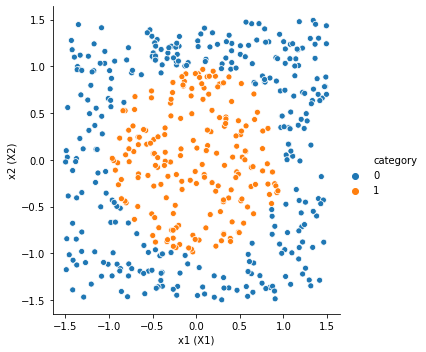

In [47]:
# look at the categorization of our data
scaled_grad_df = pd.concat([grad_x, grad_y], axis=1)
sns.relplot(x='x1 (X1)', y='x2 (X2)', data=scaled_grad_df, hue='category')

In [48]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
grad_x_train, grad_x_test, grad_y_train, grad_y_test = train_test_split(grad_x, grad_y, test_size=0.2, random_state=101)
print(grad_x_train.shape)
print(grad_x_test.shape)

(400, 6)
(100, 6)


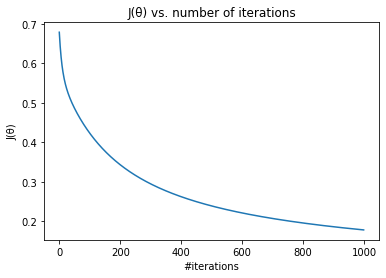

In [49]:
# let's make 100 iterations of gradient-descent for alpha = 0.1 and
# observe the convergence
fcount = len(grad_x.columns) # feature count
alpha = 0.1
iterations = 1000
costs = []
arr_y = np.array(grad_y_train).reshape(len(grad_y_train), 1)
# we start with theta to be zero vector
thetas = np.zeros(fcount).reshape(fcount,1) # (6x1)
for i in range(iterations):
    thetas = gradient_descent_iteration(alpha, thetas, grad_x_train, arr_y)
    cost = compute_cost(thetas, grad_x_train, arr_y)
    costs.append(cost)
# plot costs w.r.t number of iterations
plt.plot(range(iterations), costs)
plt.title("J(θ) vs. number of iterations")
plt.xlabel('#iterations')
plt.ylabel('J(θ)')
plt.show()

From the above plot we see that the gradient-descent method is working correctly however the choice of $\alpha$ is not that effective because gradient-descent is quite slow (taking around 1000 iterations to converge).  
Let's try multiple values for $\alpha$ and let's pick the effective one!  

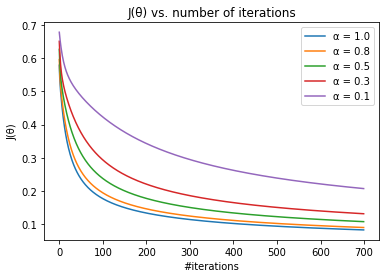

In [50]:
# require y to be (mx1) size
arr_y = np.array(grad_y_train).reshape(len(grad_y_train), 1)
# choices for alpha
alphas = [1.0, 0.8, 0.5, 0.3, 0.1]
# max. number of iterations for gradient-descent
iterations = 700
# iterate through every alpha
for alpha in alphas:
    costs = [] # stores the cost
    # we start with theta to be zero vector
    thetas = np.zeros(fcount).reshape(fcount,1) # (6x1)
    # apply iterations of gradient descent
    for i in range(iterations):
        thetas = gradient_descent_iteration(alpha, thetas, grad_x_train, arr_y)
        cost = compute_cost(thetas, grad_x_train, arr_y)
        costs.append(cost)
    # plot costs w.r.t number of iterations
    plt.plot(range(iterations), costs, label="α = {}".format(alpha))
# configure plot
plt.title("J(θ) vs. number of iterations")
plt.xlabel('#iterations')
plt.ylabel('J(θ)')
plt.legend()
plt.show()

From the above plot we can make a choice for learning rate. Let's pick $\alpha = 0.5$

In [51]:
# train the model with learning-rate of 0.5
alpha = 0.5
# we start with theta to be zero vector
thetas = np.zeros(fcount).reshape(fcount,1) # (6x1)
# max. number of iterations
iterations = 300
# make iterations
for i in range(iterations):
    thetas = gradient_descent_iteration(alpha, thetas, grad_x_train, arr_y)
# preview the parameters
print(thetas)

[[ 3.96091737]
 [-0.02003315]
 [-0.42913032]
 [-4.09459262]
 [-3.82721445]
 [-0.3450521 ]]


In [52]:
# generate the equation
equation = "Pr(y = 1 | x; θ) = {:.3f} + {:.3f}x1 + {:.3f}x2 + {:.3f}x1^2 + {:.3f}x2^2 + {:.3f}x1.x2".format(thetas[0, 0], thetas[1, 0], thetas[2, 0], thetas[3, 0], thetas[4, 0], thetas[5, 0])
print(equation)

Pr(y = 1 | x; θ) = 3.961 + -0.020x1 + -0.429x2 + -4.095x1^2 + -3.827x2^2 + -0.345x1.x2


In [53]:
# now we make predictions on the test-data
g = lambda z : 1 / (1 + np.exp(-z)) # sigmoid function
# compute the probabilities
probs = g(np.dot(grad_x_test, thetas))
probs = probs.reshape(len(probs))
# categorizes
classify = lambda x : 0 if x < 0.5 else 1
# make predictions
predictions = []
for prob in probs:
    predictions.append(classify(prob))
# preview predictions
print(np.array(predictions))
# preview actual values
actuals = grad_y_test.to_numpy()
print(actuals)

[1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0]
[1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0]


In [54]:
# generate classification reports and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(actuals, predictions))
print("")
print(confusion_matrix(actuals, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.97      0.97      0.97        38

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100


[[61  1]
 [ 1 37]]


Our gradient-descent model seems to be a good fit for our data-set.  
We have 98 correct predictions and 2 mis-predictions.  

In [55]:
# load the test data set (data never seen before by algorithm)
test_data = pd.read_csv('test-set.csv')
# preview the data
print(test_data.head())
# get more insights
print(test_data.info())
# check for missing values
print(test_data.isnull().sum())

   featureA  featureB  category
0 -1.304781  1.465600         0
1  0.172640 -1.161716         0
2 -0.608030  1.432869         0
3 -0.580992 -1.348917         0
4 -0.107868 -0.899085         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   featureA  200 non-null    float64
 1   featureB  200 non-null    float64
 2   category  200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB
None
featureA    0
featureB    0
category    0
dtype: int64


In [58]:
# separate input and output
x = test_data[['featureA', 'featureB']]
y = test_data['category']
# add additional feature to data-set
x['featureA_square'] = x['featureA']**2
x['featureB_square'] = x['featureB']**2
x['featureA_dot_featureB'] = x['featureA']*x['featureB']
# add the dummy input
x['dummy'] = 1
# reassign the columns
x = x[['dummy', 'featureA', 'featureB', 'featureA_square', 'featureB_square', 'featureA_dot_featureB']]
# rename the columns
x.columns = ['x0 (X0)', 'x1 (X1)', 'x2 (X2)', 'x1^2 (X3)', 'x2^2 (X4)', 'x1.x2 (X5)']
# preview input
x.head()

,x0 (X0),x1 (X1),x2 (X2),x1^2 (X3),x2^2 (X4),x1.x2 (X5)
0,1,-1.304781,1.465600,1.702453,2.147983,-1.912286
1,1,0.172640,-1.161716,0.029805,1.349583,-0.200558
2,1,-0.608030,1.432869,0.369700,2.053114,-0.871227
3,1,-0.580992,-1.348917,0.337551,1.819576,0.783709
4,1,-0.107868,-0.899085,0.011635,0.808354,0.096982


In [59]:
# now we make predictions on the test-data
g = lambda z : 1 / (1 + np.exp(-z)) # sigmoid function
# compute the probabilities
probs = g(np.dot(x, thetas))
probs = probs.reshape(len(probs))
# categorizes
classify = lambda x : 0 if x < 0.5 else 1
# make predictions
predictions = []
for prob in probs:
    predictions.append(classify(prob))
# preview actual values
actuals = y.to_numpy()

In [60]:
# generate classification reports and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(actuals, predictions))
print("")
print(confusion_matrix(actuals, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       141
           1       0.97      0.95      0.96        59

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200


[[139   2]
 [  3  56]]


The model performs well even on unseen data. We have 195 correct predictions and only 5/200 mis-predecitions!  
That seems to be a good fit for the training data and also on unseen data!

## Decision boundary visualization

Based on the values of $\theta$ we have the following boundary line:  
$3.961 - 0.02 x_1 - 0.429 x_2 - 4.095 x_1^2 - 3.827 x_2^2 - 0.345 x_1 x_2 \ge 0 \implies $ predict category 1  
Or we can say that $0.02 x_1 + 0.429 x_2 + 4.095 x_1^2 + 3.827 x_2^2 + 0.345 x_1 x_2 = 3.961$ is the boundary decision line  
Let's plot the decision boundary and original data to see the classification.  

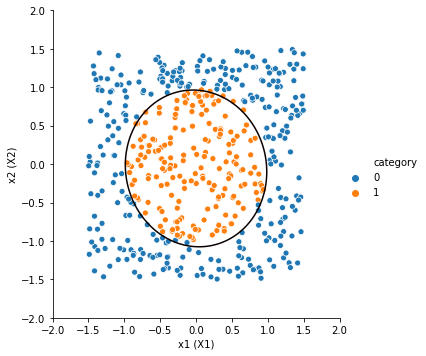

In [75]:
# space for input
x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
# equation of countour
F = thetas[0] + thetas[1]*X + thetas[2]*Y + thetas[3]*(X**2) + thetas[4]*(Y**2) + thetas[5]*X*Y
# relative plot for data
sns.relplot(x='x1 (X1)', y='x2 (X2)', data=scaled_grad_df, hue='category')
# decision boundary
plt.contour(X, Y, F, [0], cmap=plt.get_cmap('hot'))

We can see how beautifully our learning algorithm came up with decision boundary.  
That's all for the gradient-descent method!

## scipy.optimize.minimize  
Typically we use more-shopisticated in-built functions from the library instead of writing our own. We implemented the gradient-descent for explanation purposes.  
We could have also used scipy.optimize.minimize for finding the optimal value for $\theta$ based on our data-set.  

## sklearn.linear_model.LogisticRegression

In [108]:
# preview the data-set
data_set.head()

,featureA,featureB,category
0,-0.642621,-1.189619,0
1,-0.466056,-0.878662,1
2,-1.421364,1.177287,0
3,1.342973,1.491151,0
4,0.651247,-1.415052,0


In [109]:
# let's separate out the input and output
x = data_set[['featureA', 'featureB']]
y = data_set['category']
# preview the data
print(x.head())
print(y.head())

   featureA  featureB
0 -0.642621 -1.189619
1 -0.466056 -0.878662
2 -1.421364  1.177287
3  1.342973  1.491151
4  0.651247 -1.415052
0    0
1    1
2    0
3    0
4    0
Name: category, dtype: int64


In [110]:
# let's split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(x_train.shape)
print(x_test.shape)

(400, 2)
(100, 2)


In [111]:
# create a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# train the model
model.fit(x_train, y_train)

LogisticRegression()

In [112]:
# make predictions
predictions = model.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [113]:
# generate classification reports and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        62
           1       0.00      0.00      0.00        38

    accuracy                           0.62       100
   macro avg       0.31      0.50      0.38       100
weighted avg       0.38      0.62      0.47       100


[[62  0]
 [38  0]]


/home/shubham/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sklearn.linear_model.LogisticRegression has a very poor performance in this case.  

## Takeaway  
1. Logistic Regression theory i.e. hypothesis and cost-function.  
2. Gradient-descent, feature-scaling, learning-rate-choice, decision-boundary visualization.  
3. Classification-report and confusion-matrix.  
4. sklearn's inbuilt logistic regression

# Thank You